In [29]:
#necessary libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [30]:
# Load the dataset
df = pd.read_csv('heart_disease_uci.csv')

In [31]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [56]:
df.head


<bound method NDFrame.head of           age  sex  dataset  cp  trestbps      chol  fbs  restecg    thalch  \
3   -1.771446    1        0   2     0.650  0.414594    0        1  1.961389   
5    0.255948    1        0   1     0.600  0.391376    0        1  1.604617   
13  -1.024512    1        0   1     0.600  0.436153    0        1  1.406411   
15   0.362653    1        0   2     0.750  0.278607    0        1  1.446052   
16  -0.597692    1        0   1     0.550  0.379768    0        1  1.208205   
..        ...  ...      ...  ..       ...       ...  ...      ...       ...   
873  0.149243    1        3   0     0.790  0.359867    0        1 -1.090988   
890 -0.064167    1        3   0     0.620  0.402985    0        1 -0.615293   
905  0.789472    1        3   2     0.650  0.470978    0        1  0.000000   
908  2.176637    1        3   0     0.775  0.514096    0        1 -1.011706   
914 -0.811102    1        3   0     0.670  0.514096    0        1 -0.456728   

     exang   oldpeak 

In [33]:
df.describe

<bound method NDFrame.describe of       id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  Fal

In [34]:
# Check percentage of missing values
print("\nPercentage of missing values for each column:")
print((df.isnull().sum() / len(df)) * 100)



Percentage of missing values for each column:
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     6.413043
chol         3.260870
fbs          9.782609
restecg      0.217391
thalch       5.978261
exang        5.978261
oldpeak      6.739130
slope       33.586957
ca          66.413043
thal        52.826087
num          0.000000
dtype: float64


In [35]:
#duplicate rows
df.duplicated().sum()

np.int64(0)

In [36]:
#not needed
# Assuming 'df' is your DataFrame
df = df.drop(columns=['id'])

# Verify that the 'id' column is removed
print(df.head())


   age     sex    dataset               cp  trestbps   chol    fbs  \
0   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


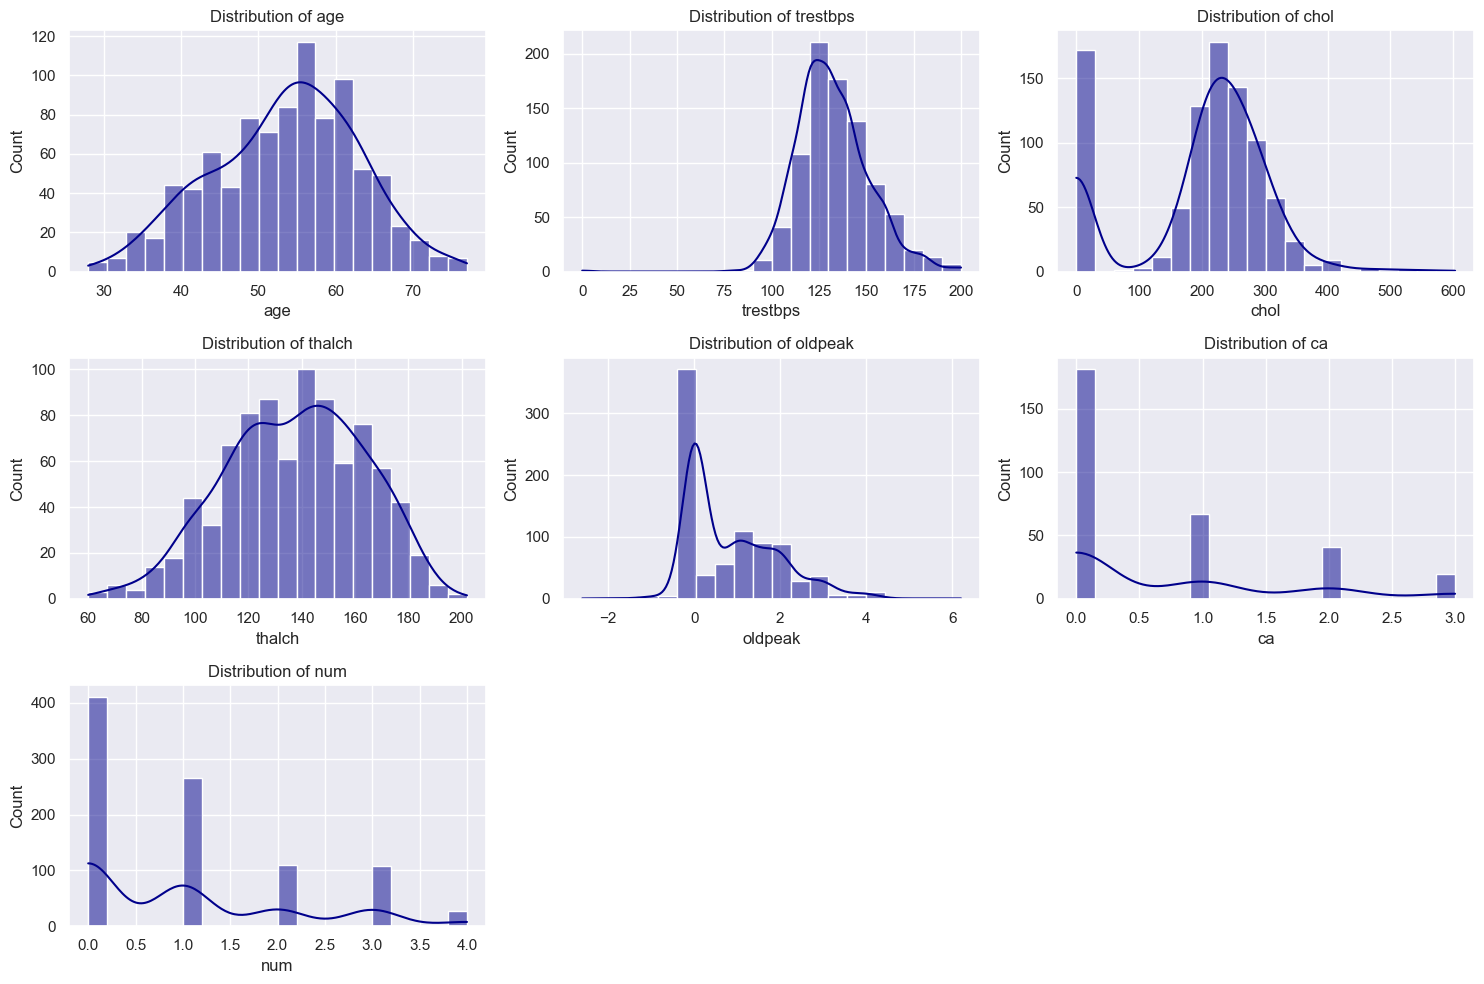

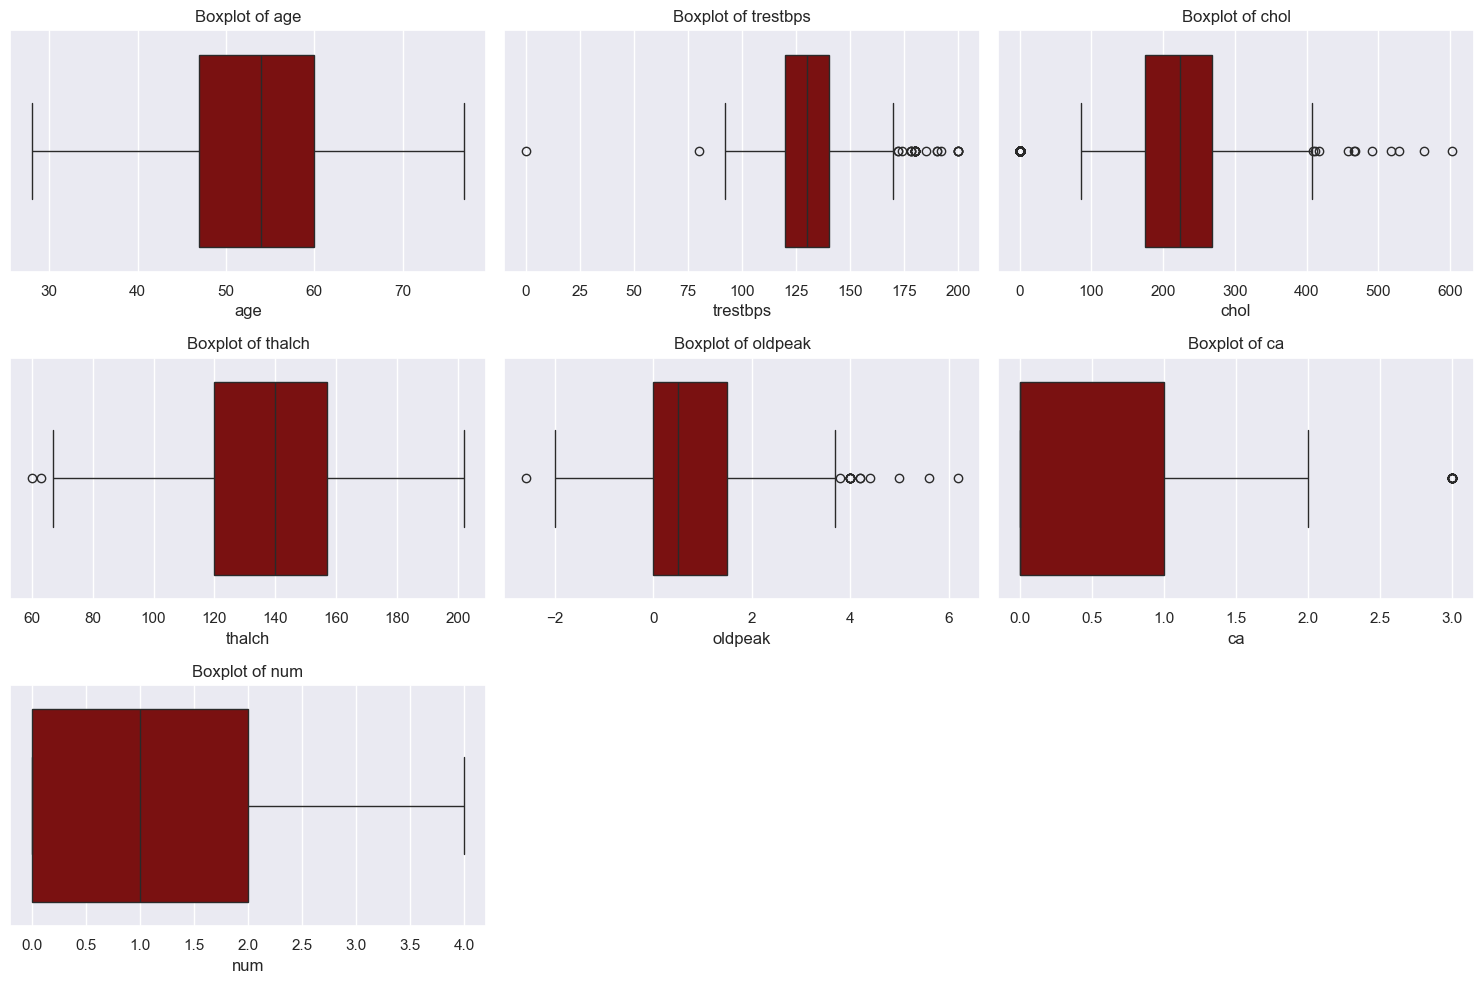

C:\Users\NOOR UL IEMAN\AppData\Local\Temp\ipykernel_36204\737048007.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='dark')
C:\Users\NOOR UL IEMAN\AppData\Local\Temp\ipykernel_36204\737048007.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='dark')
C:\Users\NOOR UL IEMAN\AppData\Local\Temp\ipykernel_36204\737048007.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='dark')
C:\Users\NOOR UL IEMAN\AppData\Local\Temp\ipykernel_36204\737048007.py:34: FutureWarning: 

Passi

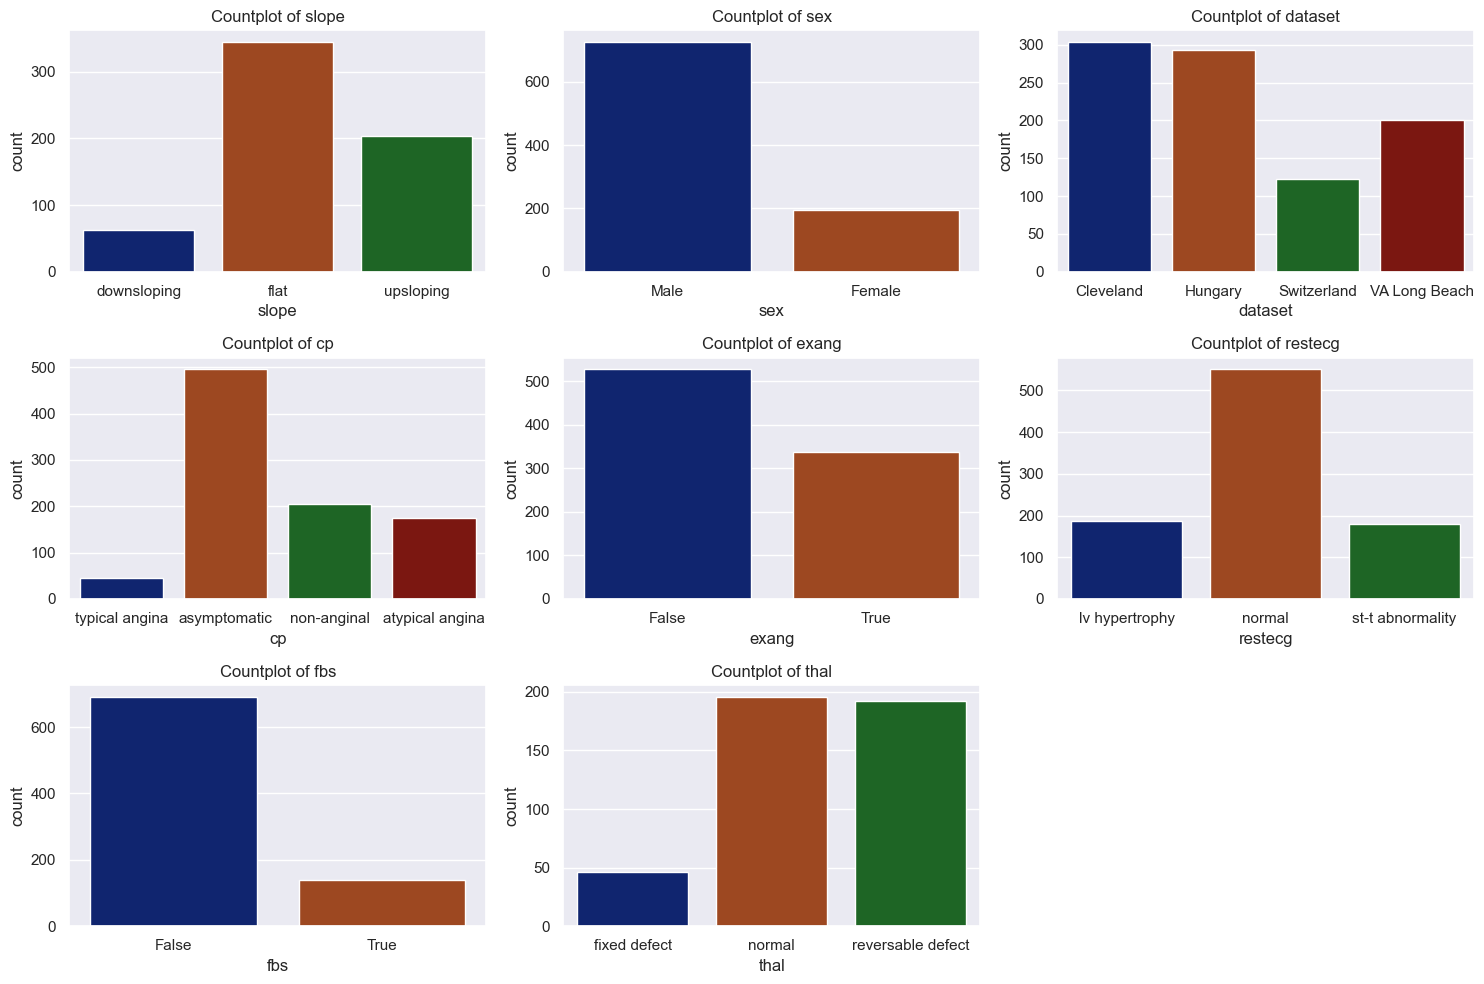

In [37]:
# Set figure style for darker colors
sns.set_theme(style="darkgrid")

# Numerical columns
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

# Categorical columns
categorical_cols = ['slope', 'sex', 'dataset', 'cp', 'exang', 'restecg', 'fbs', 'thal']

# Create plots for numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # Create a grid for plots
    sns.histplot(df[col], kde=True, color='darkblue', bins=20)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

# Create box plots for numerical columns to check for outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color='darkred')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

# Create count plots for categorical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=df[col], palette='dark')
    plt.title(f'Countplot of {col}')
    plt.tight_layout()

plt.show()


In [38]:
#handling missing values in categorical columns
# Handle missing values for 'restecg': Drop rows with missing values
df = df.dropna(subset=['restecg'])

# Handle missing values for 'exang' and 'fbs': Impute with the mode (most frequent value)
df['exang'].fillna(df['exang'].mode()[0], inplace=True)
df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)

C:\Users\NOOR UL IEMAN\AppData\Local\Temp\ipykernel_36204\2563810868.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['exang'].fillna(df['exang'].mode()[0], inplace=True)
C:\Users\NOOR UL IEMAN\AppData\Local\Temp\ipykernel_36204\2563810868.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'].fi

In [39]:
#encoding categorical to numerical 
# Columns for Ordinal Encoding
ordinal_columns = ['cp', 'restecg', 'slope', 'thal']

# Define an Ordinal Encoding dictionary (for demonstration)
# Each ordinal column is mapped to its respective order
ordinal_mapping = {
    'cp': {0: 'Typical angina', 1: 'Atypical angina', 2: 'Non-anginal pain', 3: 'Asymptomatic'},
    'restecg': {0: 'Normal', 1: 'ST-T wave abnormalities', 2: 'Left ventricular hypertrophy'},
    'slope': {0: 'Upsloping', 1: 'Flat', 2: 'Downsloping'},
    'thal': {1: 'Fixed defect', 2: 'Normal', 3: 'Reversible defect'}
}

# Apply Ordinal Encoding (using LabelEncoder for those with ordered categories)
le = LabelEncoder()

# Encoding the ordinal columns in the original DataFrame df
for col in ordinal_columns:
    df[col] = le.fit_transform(df[col])

# Now handle the binary categorical columns ('sex', 'dataset', 'fbs', 'exang')
# These columns will be Label Encoded as well since they are binary categorical
binary_columns = ['sex', 'dataset', 'fbs', 'exang']

# Apply Label Encoding for binary categorical columns and reflect changes to df
for col in binary_columns:
    df[col] = le.fit_transform(df[col])

# Verify the transformation and reflect the changes to the original DataFrame
print(df.head())

# Check the encoding (to ensure everything is transformed correctly)
print(df[ordinal_columns + binary_columns].head())


   age  sex  dataset  cp  trestbps   chol  fbs  restecg  thalch  exang  \
0   63    1        0   3     145.0  233.0    1        0   150.0      0   
1   67    1        0   0     160.0  286.0    0        0   108.0      1   
2   67    1        0   0     120.0  229.0    0        0   129.0      1   
3   37    1        0   2     130.0  250.0    0        1   187.0      0   
4   41    0        0   1     130.0  204.0    0        0   172.0      0   

   oldpeak  slope   ca  thal  num  
0      2.3      0  0.0     0    0  
1      1.5      1  3.0     1    2  
2      2.6      1  2.0     2    1  
3      3.5      0  0.0     1    0  
4      1.4      2  0.0     1    0  
   cp  restecg  slope  thal  sex  dataset  fbs  exang
0   3        0      0     0    1        0    1      0
1   0        0      1     1    1        0    0      1
2   0        0      1     2    1        0    0      1
3   2        1      0     1    1        0    0      0
4   1        0      2     1    0        0    0      0


In [40]:
#handling missing values in numerical columns
# Assuming df is the DataFrame with the dataset

# 1. Impute missing values in 'trestbps' (Resting Blood Pressure) with median (right-skewed distribution)
df['trestbps'].fillna(df['trestbps'].median(), inplace=True)

# 2. Drop rows with missing values in 'chol' (Serum Cholesterol) since the missing percentage is low
df = df.dropna(subset=['chol'])

# 3. Impute missing values in 'thalach' (Maximum Heart Rate Achieved) with mean (normally distributed)
df['thalch'].fillna(df['thalch'].mean(), inplace=True)

# 4. Impute missing values in 'oldpeak' (ST Depression) with median (right-skewed distribution)
df['oldpeak'].fillna(df['oldpeak'].median(), inplace=True)


C:\Users\NOOR UL IEMAN\AppData\Local\Temp\ipykernel_36204\1463479910.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['trestbps'].fillna(df['trestbps'].median(), inplace=True)
C:\Users\NOOR UL IEMAN\AppData\Local\Temp\ipykernel_36204\1463479910.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

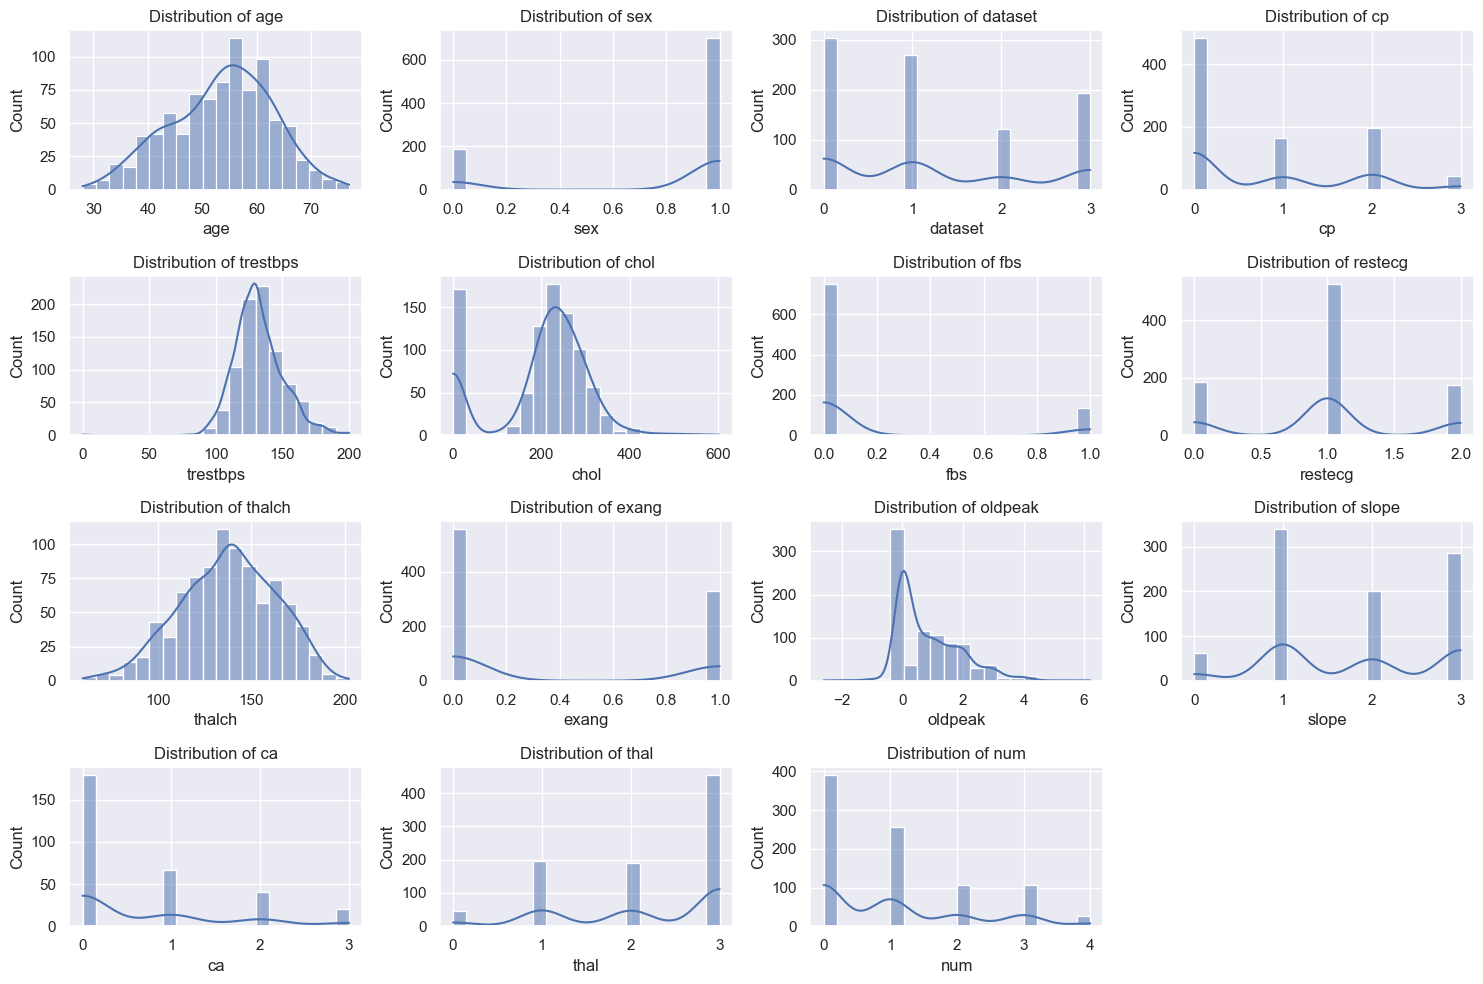

In [41]:
#analyzing data_shape
sns.set_theme(style="darkgrid")
# Plotting the distribution of the entire dataset
plt.figure(figsize=(15, 10))

# Loop through each column and plot the distribution
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)  # Adjust the number of rows and columns based on the dataset size
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

In [42]:
#applying scaling
# Assuming df is your dataframe
scalers = {
    'standard_scaler': StandardScaler(),
    'minmax_scaler': MinMaxScaler(),
}

# Standard Scaling for normal distributions
standard_scaled_features = ['age', 'thalch', 'oldpeak']
df[standard_scaled_features] = scalers['standard_scaler'].fit_transform(df[standard_scaled_features])

# Min-Max Scaling for wide-range continuous features
minmax_scaled_features = ['trestbps', 'chol']
df[minmax_scaled_features] = scalers['minmax_scaler'].fit_transform(df[minmax_scaled_features])

# Categorical/Binary features
categorical_features = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
# Encoding can be performed as needed using pd.get_dummies() or sklearn encoders
# Example:
# df = pd.get_dummies(df, columns=categorical_features, drop_first=True)




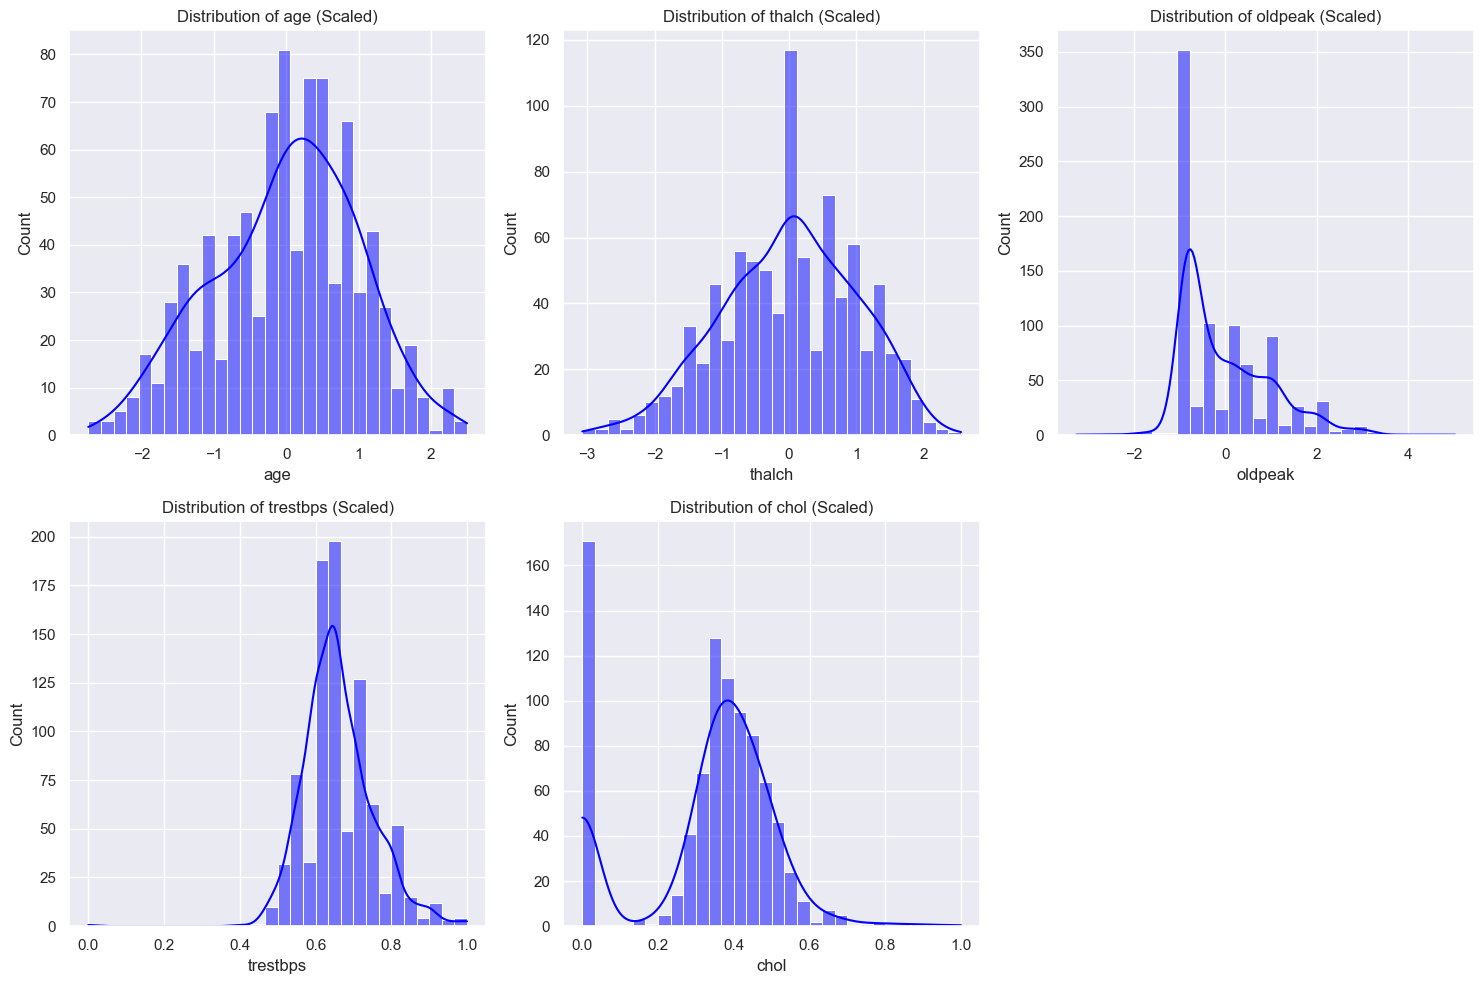

In [43]:
# List of features on which scaling was applied
scaled_features = standard_scaled_features + minmax_scaled_features

# Plot the distributions of scaled features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(scaled_features, 1):
    plt.subplot(2, 3, i)  # Adjust grid size if needed based on the number of features
    sns.histplot(df[feature], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {feature} (Scaled)")
    plt.xlabel(feature)
    plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [44]:
#applying knn to thal , ca , slope
# Select the columns to apply KNN Imputer
columns_to_impute = ['ca', 'trestbps', 'chol', 'thalch']

# Initialize the KNN Imputer with n_neighbors (you can adjust n_neighbors)
knn_imputer = KNNImputer(n_neighbors=5)

# Apply the KNN Imputer on the selected columns
df[columns_to_impute] = knn_imputer.fit_transform(df[columns_to_impute])

# Verify the imputation by checking the missing values
print(df.isnull().sum())  # Check that missing values are handled
print(df[columns_to_impute].head())  # Display the first few rows of the imputed columns

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64
    ca  trestbps      chol    thalch
0  0.0     0.725  0.386401  0.494662
1  3.0     0.800  0.474295 -1.170271
2  2.0     0.600  0.379768 -0.337804
3  0.0     0.650  0.414594  1.961389
4  0.0     0.650  0.338308  1.366770


C:\Users\NOOR UL IEMAN\AppData\Local\Temp\ipykernel_36204\597260723.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="dark")  # Set x for horizontal orientation
C:\Users\NOOR UL IEMAN\AppData\Local\Temp\ipykernel_36204\597260723.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="dark")  # Set x for horizontal orientation
C:\Users\NOOR UL IEMAN\AppData\Local\Temp\ipykernel_36204\597260723.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="dark")  # Set x for horizontal orientatio

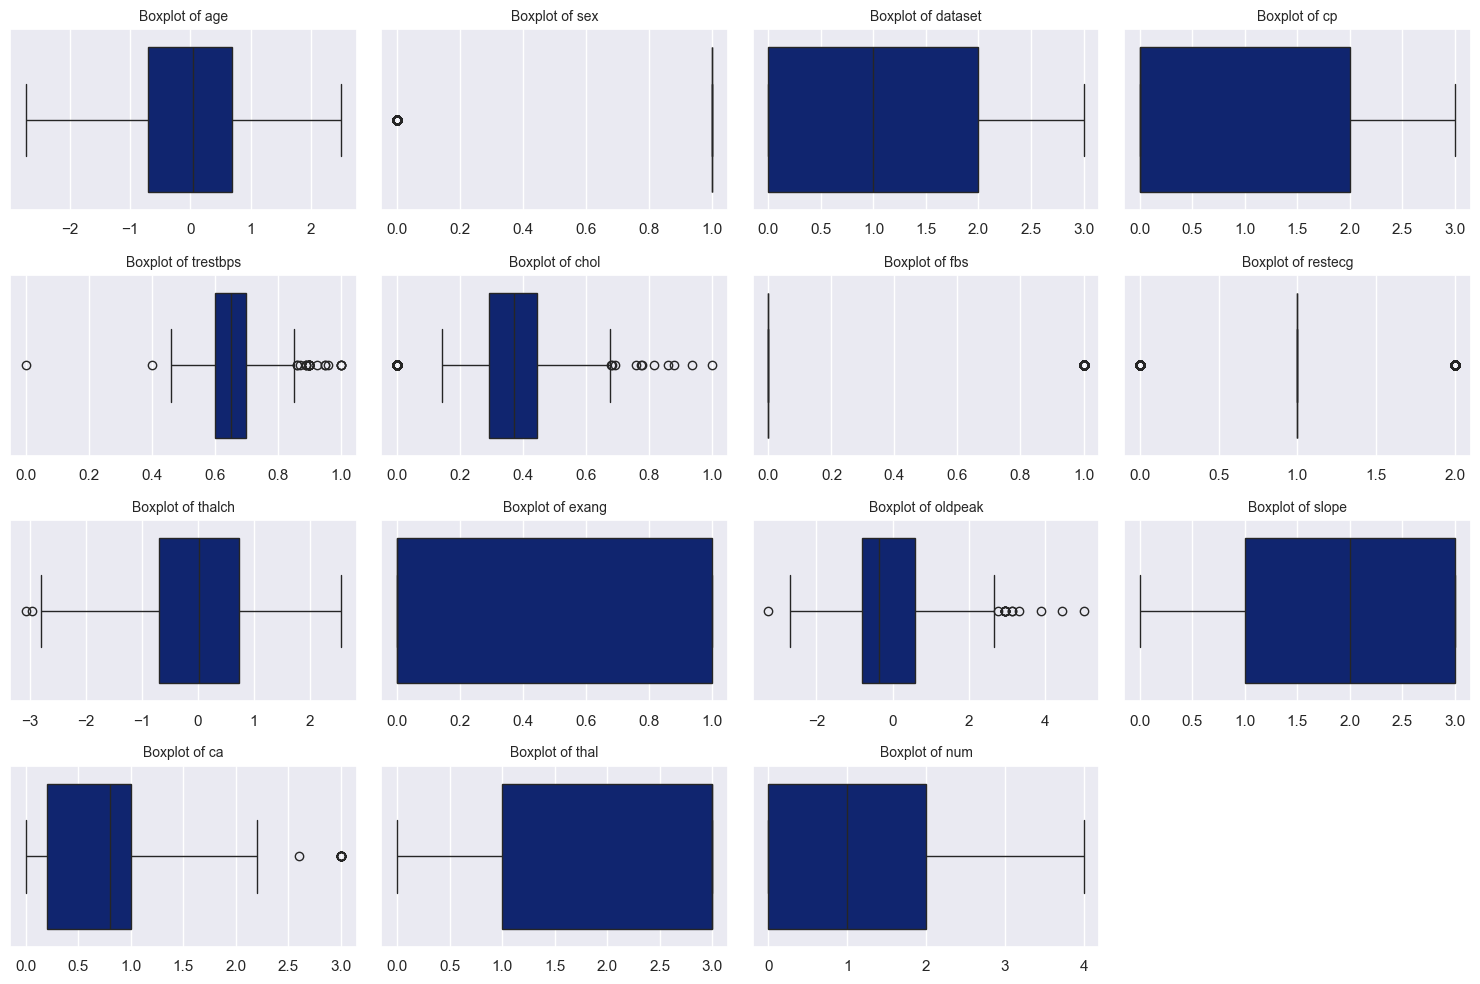

In [45]:
plt.figure(figsize=(15, 10))

# Enumerate through all columns in the dataset to create individual box plots
for i, col in enumerate(df.columns, 1):  # Assuming `df` contains all numerical columns
    plt.subplot(4, 4, i)  # Adjust rows and columns to fit all features (e.g., 4x4 for 16 features)
    sns.boxplot(x=df[col], palette="dark")  # Set x for horizontal orientation
    plt.title(f'Boxplot of {col}', fontsize=10)
    plt.ylabel('')  # Remove unnecessary y-labels for cleaner appearance
    plt.xlabel('')  # Optional: Remove x-labels if preferred

plt.tight_layout()  # Ensure proper spacing between plots
plt.show()

In [46]:
#handling outliers
# Function for IQR-based outlier removal
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Function for Winsorization (capping outliers)
def winsorize_outliers(data, col, lower_quantile=0.05, upper_quantile=0.95):
    lower_cap = data[col].quantile(lower_quantile)
    upper_cap = data[col].quantile(upper_quantile)
    data[col] = np.clip(data[col], lower_cap, upper_cap)
    return data

# Applying techniques on specific columns
# IQR-based filtering
df = remove_outliers_iqr(df, 'trestbps')
df = remove_outliers_iqr(df, 'chol')
df = remove_outliers_iqr(df, 'thalch')

# Winsorization
df = winsorize_outliers(df, 'oldpeak')


In [47]:
import pandas as pd

# Define a function to remove outliers using the IQR method
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Filter out rows with outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# List of columns to process (ensure they match your dataset's numerical columns)
columns_to_check = ['age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 
                    'fbs', 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 
                    'ca', 'thal', 'num']

# Remove outliers from the dataset
df_cleaned = remove_outliers(df, columns_to_check)

# Update the dataframe
df = df_cleaned

# Display the shape of the cleaned dataset
print(f"Original dataset shape: {df.shape}")


Original dataset shape: (224, 15)


C:\Users\NOOR UL IEMAN\AppData\Local\Temp\ipykernel_36204\597260723.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="dark")  # Set x for horizontal orientation
C:\Users\NOOR UL IEMAN\AppData\Local\Temp\ipykernel_36204\597260723.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="dark")  # Set x for horizontal orientation
C:\Users\NOOR UL IEMAN\AppData\Local\Temp\ipykernel_36204\597260723.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette="dark")  # Set x for horizontal orientatio

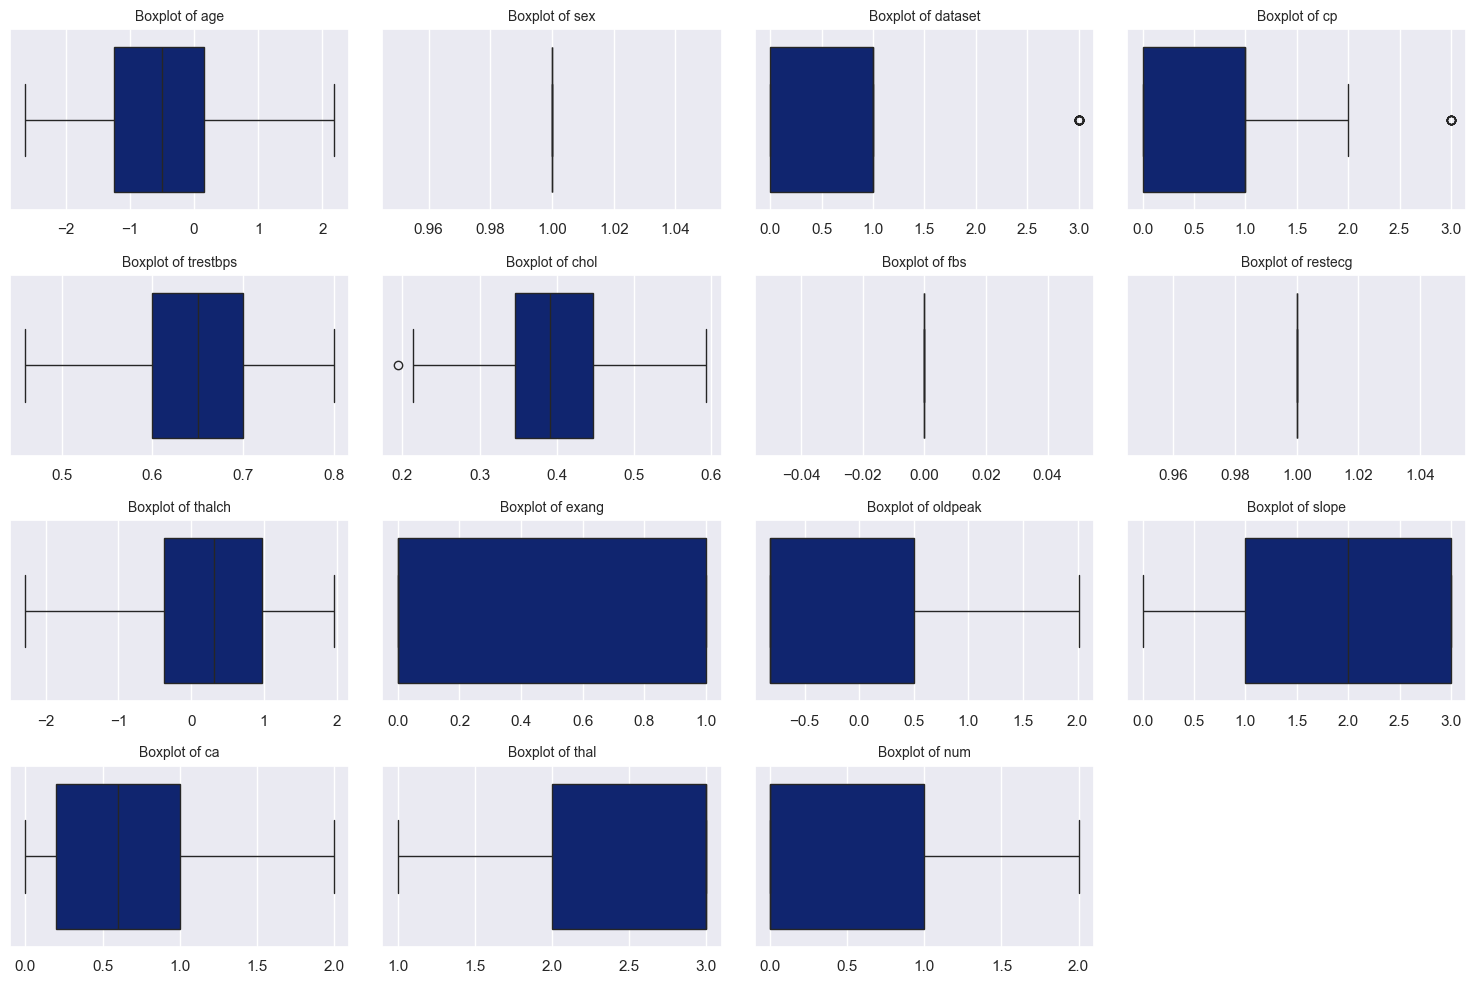

In [48]:
plt.figure(figsize=(15, 10))

# Enumerate through all columns in the dataset to create individual box plots
for i, col in enumerate(df.columns, 1):  # Assuming `df` contains all numerical columns
    plt.subplot(4, 4, i)  # Adjust rows and columns to fit all features (e.g., 4x4 for 16 features)
    sns.boxplot(x=df[col], palette="dark")  # Set x for horizontal orientation
    plt.title(f'Boxplot of {col}', fontsize=10)
    plt.ylabel('')  # Remove unnecessary y-labels for cleaner appearance
    plt.xlabel('')  # Optional: Remove x-labels if preferred

plt.tight_layout()  # Ensure proper spacing between plots
plt.show()

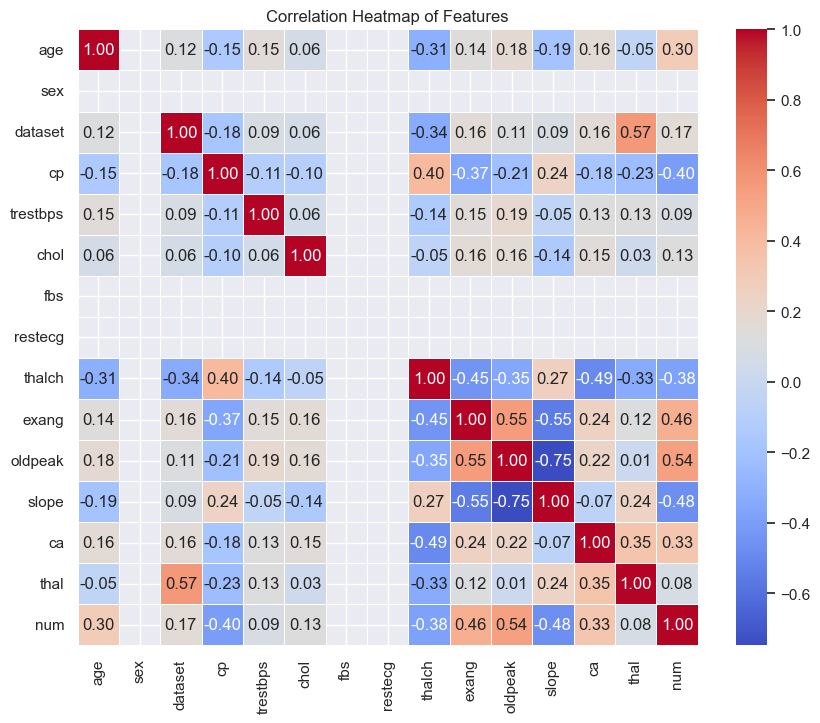

In [49]:
#analyzing correlation
# Calculate the correlation matrix for numerical features in the dataframe
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Features")
plt.show()


In [50]:
# Suggested columns for PCA
columns_for_pca = ['age', 'trestbps', 'thalch', 'oldpeak', 'ca', 'thal', 'num']

# Step 1: Select relevant columns
df_selected = df[columns_for_pca]

# Step 2: Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)

# Step 3: Apply PCA
pca = PCA()
pca_result = pca.fit_transform(scaled_data)

# Step 4: Create a DataFrame for PCA results
pca_columns = [f'PC{i+1}' for i in range(pca_result.shape[1])]
pca_df = pd.DataFrame(pca_result, columns=pca_columns)

# Step 5: Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Display results
print("Explained Variance Ratio:")
for i, var_ratio in enumerate(explained_variance, start=1):
    print(f"PC{i}: {var_ratio:.4f}")

print("\nCumulative Explained Variance:")
print(pca.explained_variance_ratio_.cumsum())

# Optional: Save PCA results to CSV
# pca_df.to_csv('pca_results.csv', index=False)


Explained Variance Ratio:
PC1: 0.3561
PC2: 0.1766
PC3: 0.1370
PC4: 0.1224
PC5: 0.0807
PC6: 0.0717
PC7: 0.0556

Cumulative Explained Variance:
[0.35609268 0.532663   0.66964132 0.79200603 0.87268956 0.94437484
 1.        ]


In [51]:
#applying pca
# Reduce data to 5 components
pca = PCA(n_components=5)
reduced_data = pca.fit_transform(scaled_data)
reduced_df = pd.DataFrame(reduced_data, columns=[f'PC{i+1}' for i in range(5)])
# PCA loadings
feature_contributions = pd.DataFrame(pca.components_, columns=columns_for_pca, index=[f'PC{i+1}' for i in range(5)])
print("Feature Contributions to Principal Components:")
print(feature_contributions)


Feature Contributions to Principal Components:
          age  trestbps    thalch   oldpeak        ca      thal       num
PC1 -0.300421 -0.213521  0.491975 -0.409099 -0.433141 -0.248243 -0.453342
PC2 -0.360125  0.024406 -0.163926 -0.374257  0.339667  0.696827 -0.319112
PC3  0.198128  0.926552  0.118454 -0.068883 -0.153766  0.024307 -0.243383
PC4  0.772872 -0.217087 -0.187610 -0.516722  0.091330 -0.053192 -0.205358
PC5 -0.207901  0.133864  0.050312 -0.145558  0.739801 -0.594362 -0.120697


In [52]:
df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
3,-1.771446,1,0,2,0.65,0.414594,0,1,1.961389,0,2.008614,0,0.0,1,0
5,0.255948,1,0,1,0.60,0.391376,0,1,1.604617,0,-0.061349,2,0.0,1,0
13,-1.024512,1,0,1,0.60,0.436153,0,1,1.406411,0,-0.814062,2,0.0,2,0
15,0.362653,1,0,2,0.75,0.278607,0,1,1.446052,0,0.691365,2,0.0,1,0
16,-0.597692,1,0,1,0.55,0.379768,0,1,1.208205,0,0.126830,0,0.0,2,1


In [53]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Define target (y) and features (X)
X = df.drop(columns=['num'])  # Assuming 'num' is the target column
y = df['num']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
logistic_model = LogisticRegression(max_iter=500, random_state=42)
logistic_model.fit(X_train, y_train)
logistic_preds = logistic_model.predict(X_test)
logistic_acc = accuracy_score(y_test, logistic_preds)
print("Logistic Regression:")
print(f"Accuracy: {logistic_acc:.2f}")
print(classification_report(y_test, logistic_preds))
print()

# Decision Tree
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)
decision_tree_preds = decision_tree_model.predict(X_test)
decision_tree_acc = accuracy_score(y_test, decision_tree_preds)
print("Decision Tree:")
print(f"Accuracy: {decision_tree_acc:.2f}")
print(classification_report(y_test, decision_tree_preds))
print()

# Support Vector Machine
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)
print("Support Vector Machine:")
print(f"Accuracy: {svm_acc:.2f}")
print(classification_report(y_test, svm_preds))
print()

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
knn_acc = accuracy_score(y_test, knn_preds)
print("K-Nearest Neighbors:")
print(f"Accuracy: {knn_acc:.2f}")
print(classification_report(y_test, knn_preds))
print()

# Random Forest
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_preds = random_forest_model.predict(X_test)
random_forest_acc = accuracy_score(y_test, random_forest_preds)
print("Random Forest:")
print(f"Accuracy: {random_forest_acc:.2f}")
print(classification_report(y_test, random_forest_preds))
print()

# Gradient Boosting
gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)
gradient_boosting_preds = gradient_boosting_model.predict(X_test)
gradient_boosting_acc = accuracy_score(y_test, gradient_boosting_preds)
print("Gradient Boosting:")
print(f"Accuracy: {gradient_boosting_acc:.2f}")
print(classification_report(y_test, gradient_boosting_preds))
print()

# Naive Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)
naive_bayes_preds = naive_bayes_model.predict(X_test)
naive_bayes_acc = accuracy_score(y_test, naive_bayes_preds)
print("Naive Bayes:")
print(f"Accuracy: {naive_bayes_acc:.2f}")
print(classification_report(y_test, naive_bayes_preds))
print()


Logistic Regression:
Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        27
           1       0.64      0.56      0.60        16
           2       1.00      1.00      1.00         2

    accuracy                           0.73        45
   macro avg       0.80      0.79      0.80        45
weighted avg       0.73      0.73      0.73        45


Decision Tree:
Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.74      0.63      0.68        27
           1       0.45      0.56      0.50        16
           2       0.00      0.00      0.00         2

    accuracy                           0.58        45
   macro avg       0.40      0.40      0.39        45
weighted avg       0.60      0.58      0.59        45


Support Vector Machine:
Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        27
           1       0.6

C:\Users\NOOR UL IEMAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NOOR UL IEMAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NOOR UL IEMAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.56      0.56      0.56        16
           2       0.00      0.00      0.00         2

    accuracy                           0.69        45
   macro avg       0.45      0.46      0.45        45
weighted avg       0.67      0.69      0.68        45


Random Forest:
Accuracy: 0.78
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        27
           1       0.71      0.62      0.67        16
           2       1.00      0.50      0.67         2

    accuracy                           0.78        45
   macro avg       0.84      0.67      0.73        45
weighted avg       0.78      0.78      0.77        45


Gradient Boosting:
Accuracy: 0.76
              precision    recall  f1-score   support

           0       0.76      0.93      0.83        27
           1       0.73      0.50      0.59        16
         

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. Define preprocessing steps for numerical and categorical columns
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'thal']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'dataset']

# Preprocessors
numerical_transformer = Pipeline(steps=[
    ('knn_imputer', KNNImputer(n_neighbors=5)),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Combine preprocessors using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 2. Dimensionality reduction using PCA
pca = PCA(n_components=5)

# 3. Classifier
classifier = RandomForestClassifier(random_state=42)

# 4. Combine everything in a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('dim_reduction', pca),
    ('classifier', classifier)
])

# 5. Split data
X = df.drop(columns=['num'])
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Fit pipeline and evaluate
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# 7. Evaluate results
print("Pipeline Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Pipeline Performance:
Accuracy: 0.71
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.81      0.79        27
           1       0.60      0.56      0.58        16
           2       1.00      0.50      0.67         2

    accuracy                           0.71        45
   macro avg       0.79      0.63      0.68        45
weighted avg       0.71      0.71      0.71        45



In [55]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('knn_imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'trestbps', 'chol',
                                                   'thalch', 'oldpeak', 'ca',
                                                   'thal']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['sex', 'cp', 'fbs',
                                                   'restecg', 'exang', 'slope',
                                                   'dataset'])])),
                ('dim_reduction', PCA(n_components=5)),
                ('classifier', RandomForestClassifier(random_state=42))])